In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn import preprocessing as pre


%matplotlib inline

In [4]:
# load dataset
df = pd.read_csv("merge1.csv")
df.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [5]:
df.drop(["row_id","county_code","state"], axis=1, inplace=True)
#df.pct_adult_smoking = df.pct_adult_smoking.fillna(0)
    #df.pct_adult_smoking.median())
#df.pct_low_birthweight = df.pct_low_birthweight.fillna(0)
    #df.pct_low_birthweight.median())
#df.pct_excessive_drinking = df.pct_excessive_drinking.fillna(0)
    #df.pct_excessive_drinking.median())
#df.homicides_per_100k = df.homicides_per_100k.fillna(0)
#df.homicides_per_100k.median())
#df.motor_vehicle_crash_deaths_per_100k = df.motor_vehicle_crash_deaths_per_100k.fillna(0)
#df.motor_vehicle_crash_deaths_per_100k.median())
#df.pop_per_dentist = df.pop_per_dentist.fillna(0)
#df.pop_per_dentist.median())
#df.pop_per_primary_care_physician = df.pop_per_primary_care_physician.fillna(0)
#df.pop_per_primary_care_physician.median())
#df.median_property_value = df.median_property_value.fillna(df.median_property_value.median())
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
#df.air_pollution_particulate_matter_value = df.air_pollution_particulate_matter_value.fillna(df.air_pollution_particulate_matter_value.median())

df.drop(["pct_adult_smoking","pct_low_birthweight","pct_excessive_drinking","homicides_per_100k","motor_vehicle_crash_deaths_per_100k","pop_per_dentist","pop_per_primary_care_physician"], axis=1, inplace=True)

columns = ["rucc", "urban_influence", "economic_typology","year"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,0.070193,...,0,0,0,0,0,0,1,0,0,1
1,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,0.037419,...,0,0,0,0,0,0,1,0,1,0
2,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,0.046922,...,0,0,0,0,0,0,0,1,0,1
3,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,0.081067,...,0,0,0,0,0,0,1,0,1,0
4,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,0.035753,...,0,1,0,1,0,0,0,0,1,0
5,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,0.076131,...,0,0,0,0,0,0,1,0,0,1
6,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,0.017288,...,0,0,1,0,0,0,0,0,1,0
7,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,0.023532,...,0,0,0,0,0,0,1,0,1,0
8,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,0.092045,...,0,0,0,0,1,0,0,0,0,1
9,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,0.017676,...,0,1,0,0,0,0,1,0,0,1


In [6]:
ev = df['evictions']
df.drop(labels=['evictions'], axis=1,inplace = True)
df.insert(0, 'evictions', ev)
df.head()

,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,681,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,29,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,841,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,2,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0


In [7]:
df.dropna(axis = 0, inplace = True)
df

,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,681,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,29,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,841,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,2,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0
5,4191,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,...,0,0,0,0,0,0,1,0,0,1
6,24,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,...,0,0,1,0,0,0,0,0,1,0
7,225,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,...,0,0,0,0,0,0,1,0,1,0
8,93,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,...,0,0,0,0,1,0,0,0,0,1
9,6,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,...,0,1,0,0,0,0,1,0,0,1


In [8]:
data = df.values

Features = np.array(data[:, 1:])
Labels = np.array(data[:, 0])
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(2541, 63)
(2541,)


In [9]:
nr.seed(123)
inside = ms.KFold(n_splits=3, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=3, shuffle = True)

In [10]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha":[0.00001,0.0001,0.001], 
              "early_stopping":[True, False], 
              "beta_1":[0.95,0.90,0.99], 
              "beta_2":[0.999,0.99,0.97]}

## Define the Neural Network model
nn_clf = MLPRegressor(hidden_layer_sizes = (100,100),
                       max_iter=400)

## Perform the grid search over the parameters
nr.seed(3456)
nn_clf = ms.GridSearchCV(estimator = nn_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)

nr.seed(6677)
nn_clf.fit(Features, Labels)
print(nn_clf.best_estimator_.alpha)
print(nn_clf.best_estimator_.early_stopping)
print(nn_clf.best_estimator_.beta_1)
print(nn_clf.best_estimator_.beta_2)

1e-05
False
0.95
0.999


In [11]:
nr.seed(498)
cv_estimate = ms.cross_val_score(nn_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = -0.430
SDT of the metric       = 1.482
Outcomes by cv fold
Fold  1    0.740
Fold  2    -2.522
Fold  3    0.491


In [12]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 750)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [13]:
scaler = pre.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
nr.seed(1115)
nn_mod = MLPRegressor(hidden_layer_sizes = (100,100), 
                       alpha =nn_clf.best_estimator_.alpha, 
                       early_stopping = nn_clf.best_estimator_.early_stopping, 
                       beta_1 = nn_clf.best_estimator_.beta_1, 
                       beta_2 = nn_clf.best_estimator_.beta_2,
                       max_iter = 400,solver='lbfgs')
nn_mod.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.95,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [15]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = nn_mod.predict(X_test_scaled) 
print_metrics(y_test, y_score, 70) 

Mean Square Error      = 328330.841448385
Root Mean Square Error = 573.0016068462504
Mean Absolute Error    = 154.4464837329299
Median Absolute Error  = 25.516830923359414
R^2                    = 0.8572338458920853
Adjusted R^2           = 0.8427472802546645


In [16]:
print(y_score)

[ 2.26447497e+02  7.20909621e+01  3.72201197e+01  8.32239084e+00
  1.71974693e+02  2.38752783e+02  5.25777479e+01 -1.13598567e+01
  6.07282291e+01 -5.50099542e+00  1.04970987e+02  6.72325285e+01
  2.29523694e+02  3.06038593e+03  1.20057436e+02  1.95969965e+02
  1.24158604e+02  1.14642877e+02  5.92541107e+01  3.81789543e+00
  5.42596642e+02  3.12695610e+01  1.64145623e+01  2.60087390e+02
  8.16347439e+02  1.21826898e+01  1.31034639e+02  5.89583253e+01
  1.69391342e+01  1.19708945e+04  1.29773114e+01  9.23462887e+00
  7.67475849e+01  4.13705115e+00  2.80421558e+00  6.56023341e+00
  1.14151904e+01  6.30957366e+00  2.49845168e+01 -6.31174643e-01
  1.59497546e+02  6.43879767e+00  9.74680332e+01  5.61428763e+01
  1.61564113e+02 -5.78060432e+00  2.33575379e+02  2.77881472e+02
  4.76558850e+01  1.46910139e+02  7.31167700e+00  2.64449559e+01
 -1.32296524e+01 -1.23218734e+00 -3.59935954e+00  1.61363104e+00
  1.37387141e+03  2.21805140e+03  1.74765527e+00  6.50442795e-01
  1.11778119e+00  3.27499

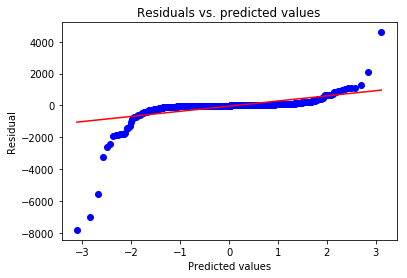

In [17]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

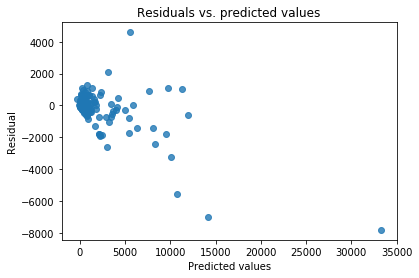

In [18]:
import seaborn as sns
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

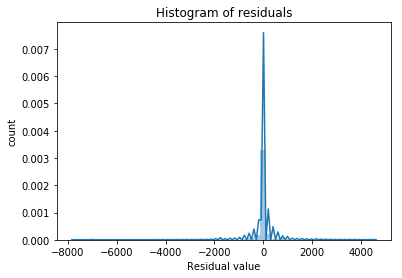

In [19]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

In [25]:
test1 = pd.read_csv("test_values.csv")
test1.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a110aae,a,37520b7,171046.0,17342.0,25.310,672.0,42828.0,99353.0,...,1399.0,0.509,0.239,0.149,0.112450,0.346386,0.357430,0.183735,12.238462,9.983245
1,1,daa811a,b,3c7c507,114518.0,13776.0,29.492,657.0,53712.0,149404.0,...,1790.0,0.497,0.234,0.154,0.089357,0.366466,0.311245,0.232932,10.213609,8.902167
2,2,04b5074,a,3c7c507,4452.0,317.0,13.208,506.0,48642.0,140740.0,...,1490.0,0.481,0.161,0.247,0.088176,0.395792,0.345691,0.170341,4.697987,10.514541
3,3,261a880,b,be99678,16883.0,1703.0,29.757,786.0,40827.0,139862.0,...,1510.0,0.501,0.236,0.200,0.130261,0.379760,0.330661,0.159319,11.168180,12.601529
4,4,3f91d56,b,26926ff,71393.0,7974.0,30.864,650.0,44688.0,103120.0,...,2419.0,0.526,0.246,0.150,0.129611,0.354935,0.334995,0.180459,12.941045,11.066342


In [26]:
test1.drop(["row_id","county_code","state"], axis=1, inplace=True)
#test1.pct_adult_smoking = test1.pct_adult_smoking.fillna(0)
#test1.pct_low_birthweight = test1.pct_low_birthweight.fillna(0)
#test1.pct_excessive_drinking = test1.pct_excessive_drinking.fillna(0)
#test1.homicides_per_100k = test1.homicides_per_100k.fillna(0)
#test1.motor_vehicle_crash_deaths_per_100k = test1.motor_vehicle_crash_deaths_per_100k.fillna(0)
#test1.pop_per_dentist = test1.pop_per_dentist.fillna(0)
#test1.pop_per_primary_care_physician = test1.pop_per_primary_care_physician.fillna(0)
test1.median_gross_rent = test1.median_gross_rent.fillna(0)
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
test1.air_pollution_particulate_matter_value = test1.air_pollution_particulate_matter_value.fillna(0)

test1.drop(["pct_adult_smoking","pct_low_birthweight","pct_excessive_drinking","homicides_per_100k","motor_vehicle_crash_deaths_per_100k","pop_per_dentist","pop_per_primary_care_physician"], axis=1, inplace=True)

columns = ["rucc", "urban_influence", "economic_typology","year"]
test1 = pd.get_dummies(test1, columns=columns)
test1.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,171046.0,17342.0,25.310,672.0,42828.0,99353.0,34.738,0.768640,0.136740,0.051869,...,0,1,0,0,1,0,0,0,1,0
1,114518.0,13776.0,29.492,657.0,53712.0,149404.0,25.108,0.859299,0.014054,0.058939,...,0,1,0,0,1,0,0,0,0,1
2,4452.0,317.0,13.208,506.0,48642.0,140740.0,25.072,0.976854,0.002000,0.010068,...,0,0,0,0,0,0,0,1,1,0
3,16883.0,1703.0,29.757,786.0,40827.0,139862.0,30.767,0.883453,0.000000,0.080657,...,0,1,0,0,0,0,1,0,0,1
4,71393.0,7974.0,30.864,650.0,44688.0,103120.0,27.092,0.732230,0.028232,0.047745,...,0,0,0,0,0,0,1,0,0,1
5,120494.0,13474.0,27.898,720.0,47860.0,94634.0,32.304,0.945367,0.007736,0.023179,...,0,1,0,0,0,0,1,0,0,1
6,8309.0,739.0,26.231,572.0,39405.0,73843.0,21.282,0.734904,0.162135,0.072467,...,0,0,0,1,0,0,0,0,1,0
7,94994.0,6731.0,19.624,949.0,86323.0,268922.0,27.933,0.900692,0.011324,0.040355,...,0,0,0,0,1,0,0,0,1,0
8,411859.0,50689.0,30.689,715.0,42326.0,89254.0,34.066,0.724933,0.202547,0.032176,...,0,1,0,0,0,0,1,0,1,0
9,25037.0,3070.0,33.433,583.0,32913.0,63992.0,27.749,0.826291,0.107505,0.046048,...,0,0,0,0,1,0,0,0,1,0


In [27]:
pd.isnull(test1).sum() > 0

population                                                                                                            False
renter_occupied_households                                                                                            False
pct_renter_occupied                                                                                                   False
median_gross_rent                                                                                                     False
median_household_income                                                                                               False
median_property_value                                                                                                 False
rent_burden                                                                                                           False
pct_white                                                                                                             False
pct_af_a

In [28]:
test = test1.values

Features_test = np.array(test)

print(Features_test.shape)


(2420, 63)


In [32]:
z_test = scaler.fit_transform(Features_test)

In [33]:
outcome = nn_mod.predict(z_test) 

In [34]:
print(outcome)

[ 6.46393817e+02  4.83170770e+01  1.62389234e+00 ...  2.03745276e+03
 -3.39986046e+01  3.50043213e+02]


In [ ]:

np.savetxt("NNzeroFilledScaled.csv", outcome, delimiter=",")